<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Функции-для-расчетов" data-toc-modified-id="Функции-для-расчетов-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Функции для расчетов</a></span></li><li><span><a href="#Общая-информация-о-датафрейме" data-toc-modified-id="Общая-информация-о-датафрейме-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Общая информация о датафрейме</a></span></li><li><span><a href="#Изменение-размера-выборки-от-исходного-датафрейма" data-toc-modified-id="Изменение-размера-выборки-от-исходного-датафрейма-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Изменение размера выборки от исходного датафрейма</a></span></li><li><span><a href="#Подготовка-текста-(общий-порядок)" data-toc-modified-id="Подготовка-текста-(общий-порядок)-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Подготовка текста (общий порядок)</a></span></li><li><span><a href="#Удаление-ненужных-признаков-датафрейма" data-toc-modified-id="Удаление-ненужных-признаков-датафрейма-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Удаление ненужных признаков датафрейма</a></span></li><li><span><a href="#Лемматизация" data-toc-modified-id="Лемматизация-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Лемматизация</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Подготовка-к-обучению-моделей" data-toc-modified-id="Подготовка-к-обучению-моделей-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Подготовка к обучению моделей</a></span></li><li><span><a href="#Балансировка-классов" data-toc-modified-id="Балансировка-классов-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Балансировка классов</a></span></li><li><span><a href="#Векторизация-слов-методом-TF-IDF" data-toc-modified-id="Векторизация-слов-методом-TF-IDF-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Векторизация слов методом TF-IDF</a></span></li></ul></li><li><span><a href="#Модели" data-toc-modified-id="Модели-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модели</a></span><ul class="toc-item"><li><span><a href="#DecisionTreeClassifier" data-toc-modified-id="DecisionTreeClassifier-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>DecisionTreeClassifier</a></span></li><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>LogisticRegression</a></span></li><li><span><a href="#RandomForestClassifier" data-toc-modified-id="RandomForestClassifier-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>RandomForestClassifier</a></span></li></ul></li><li><span><a href="#Тест-лучшей-модели" data-toc-modified-id="Тест-лучшей-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тест лучшей модели</a></span></li><li><span><a href="#Итоговые-результаты" data-toc-modified-id="Итоговые-результаты-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Итоговые результаты</a></span></li><li><span><a href="#Советы-от-ревьюера" data-toc-modified-id="Советы-от-ревьюера-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Советы от ревьюера</a></span></li></ul></div>

# Проект для «Викишоп»

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

## Подготовка

### Загрузка данных

In [1]:
# установка нехватающих библиотек
# !pip install

In [2]:
# для анализа и работы с данными
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# модели ML
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier

from sklearn.utils import shuffle
from sklearn.model_selection import (train_test_split,
                                     GridSearchCV,
                                     cross_val_score)

import warnings
warnings.filterwarnings("ignore")

# метрики для алгоритмов ML
from sklearn.metrics import (roc_curve,
                             roc_auc_score,
                             f1_score,
                             confusion_matrix,
                             ConfusionMatrixDisplay,
                             precision_score,
                             classification_report,
                             precision_recall_curve,
                             recall_score)

# счетчик времени
import time

                             
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import (stopwords,
                         wordnet)

# библиотеки для обработи текста
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

from sklearn.feature_extraction.text import (TfidfVectorizer,
                                             CountVectorizer)
import re

# статус процесса
from tqdm import tqdm
tqdm.pandas()
from datetime import datetime as dt

# константы и доп.функции
RS = 87
STOP_WORDS = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
target_names=['Is toxic', 'Non-toxic']

# настройка отображения чисел и таблиц
pd.set_option('display.float_format', '{:.4f}'.format)
pd.set_option('display.max_columns', 1000)
pd.set_option('max_colwidth', 1000)
pd.set_option('display.width', 500)

# общее формление для графиков
sns.set(style="white", palette="Paired")

[nltk_data] Downloading package wordnet to /Users/andrey/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/andrey/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/andrey/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/andrey/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [3]:
# загрузка датафрейма (try - локально, except - по ссылке)
try:
    df = pd.read_csv('/Users/andrey/Desktop/Jupiter EDU/toxic_comments.csv')
    # для Windows: df = pd.read_csv('D:/jupyter notebook EDU/data/toxic_comments.csv')
    # для MAC: df = pd.read_csv('/Users/andrey/Desktop/Jupiter EDU/toxic_comments.csv')
   
except:
    df = pd.read_csv('https://_____________________toxic_comments.csv')

### Функции для расчетов

In [4]:
def df_info(df):
    '''
    функция для вывода основных показателей датафрейма
    
    '''
    print("-"*100)
    print('Общая информамия о датафрейме:')
    print("-"*100)
    print(df.info())
    
    print("-"*100)
    print('Первые 5 строк таблицы')
    print("-"*100)
    display(df.head(5))
    
    print("-"*100)
    print('Количество пропусков')
    print("-"*100)
    print(df.isnull().sum().sort_values(ascending=False))
    
    print("-"*100)
    print('Статистические данные датафрейма')
    print("-"*100)
    display(np.round(df.describe(), 2).T)
    
    print("-"*100)
    print('Количество дубликатов:')
    print("-"*100)
    display(df.duplicated().sum())

In [5]:
def clear_text(text):
    '''
    функция, которая оставит в тексте только кириллические символы и пробелы
    
    '''
    clear = re.sub(r"[^'a-zA-Z ]", ' ', text) 
    clear = " ".join(clear.split())
    return clear

In [6]:
def wordnet_pos(word):
    '''
    функция для создания списка кортежей, где каждый кортеж содержит слово и его часть речи
    
    '''
    tag = nltk.pos_tag([word])[0][1][0].lower()
    dic = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return dic.get(tag, wordnet.NOUN)

In [7]:
def lemmatize_text(text):
    '''
    функция для лемматизации текста
    
    '''
    k = []
    for i in nltk.word_tokenize(text):
        y = lemmatizer.lemmatize(i, wordnet_pos(i))
        k.append(y)
    return ' '.join(k) 

In [8]:
def up_sample(X, y, fraction, repeat):
    '''
    функция для увеличения выборки для положительных комментариев - '0'
    и уменьшению выборки для отрицательных комментариев '1'
    '''

    X_zeros = X[y == 0]
    X_ones = X[y == 1]
    y_zeros = y[y == 0]
    y_ones = y[y == 1]

    X_up = pd.concat([X_zeros.sample(frac = fraction, random_state = RS)] + [X_ones] * repeat)
    y_up = pd.concat([y_zeros.sample(frac = fraction, random_state = RS)] + [y_ones] * repeat)
    
    X_up_sampled, y_up_sampled = shuffle(X_up, y_up, random_state = RS)
    
    return X_up_sampled, y_up_sampled

In [9]:
def f1_plot(true, predict):
    '''
    функция для определения метрики f1
    и отроисовки графика распределения плотности предсказанных значений
    
    '''
    f1 = f1_score(y_test, predict)
    plt.figure(figsize = (8, 5))
    true.plot(kind = 'kde', linewidth = 2)
    pd.Series(predict).plot(kind = 'kde', linewidth = 2)
    plt.title('Распределение плотности значений', y = 1.01)
    plt.legend(['true', 'predict'])
    plt.text(0.75, 1, 'F1= {:.2f}'.format(f1))
    plt.ylabel('Плотность')
    plt.show()

### Общая информация о датафрейме

In [10]:
df_info(df)

----------------------------------------------------------------------------------------------------
Общая информамия о датафрейме:
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  159292 non-null  int64 
 1   text        159292 non-null  object
 2   toxic       159292 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.6+ MB
None
----------------------------------------------------------------------------------------------------
Первые 5 строк таблицы
----------------------------------------------------------------------------------------------------


,Unnamed: 0,text,toxic
0,0,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0
1,1,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0
2,2,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",0
3,3,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_article_nominations#Transport """,0
4,4,"You, sir, are my hero. Any chance you remember what page that's on?",0


----------------------------------------------------------------------------------------------------
Количество пропусков
----------------------------------------------------------------------------------------------------
Unnamed: 0    0
text          0
toxic         0
dtype: int64
----------------------------------------------------------------------------------------------------
Статистические данные датафрейма
----------------------------------------------------------------------------------------------------


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,159292.0000,79725.7000,46028.8400,0.0000,39872.7500,79721.5000,119573.2500,159450.0000
toxic,159292.0000,0.1000,0.3000,0.0000,0.0000,0.0000,0.0000,1.0000


----------------------------------------------------------------------------------------------------
Количество дубликатов:
----------------------------------------------------------------------------------------------------


0

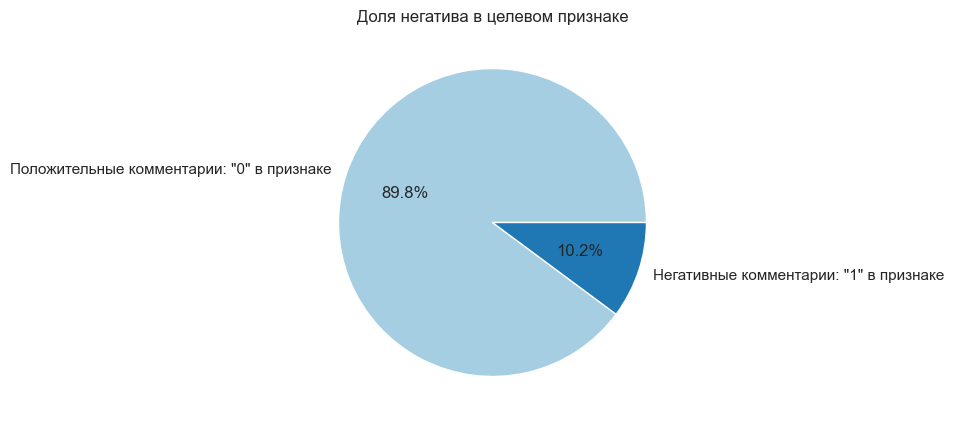

In [11]:
# круговая диаграмма распределения целевого признака негатив/позитив
plt.figure(figsize = (5, 5))
plt.title('Доля негатива в целевом признаке')
plt.pie(df['toxic'].value_counts(),
        labels = {'Положительные комментарии: "0" в признаке',
                  'Негативные комментарии: "1" в признаке'},
        autopct = '%1.1f%%');
plt.show()

In [12]:
# длинна комментариев
length = df['text'].str.len()

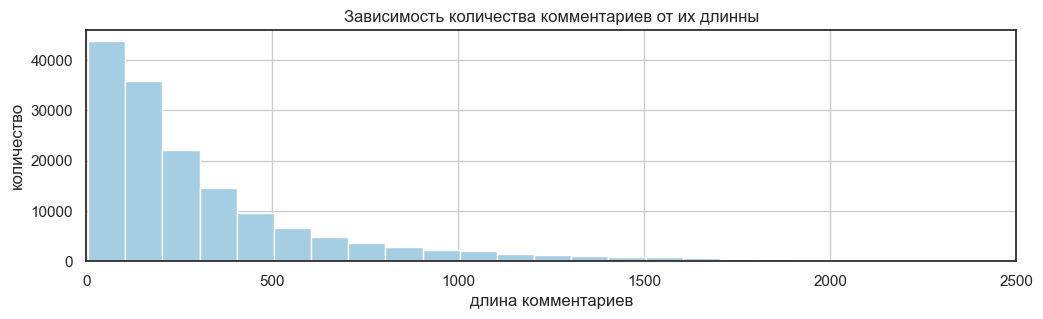

In [13]:
# график зависимости количества комментариев от их длинны
plt.figure(figsize = (12, 3))
length.hist(bins = 50);
plt.title('Зависимость количества комментариев от их длинны')
plt.xlabel('длина комментариев')
plt.ylabel('количество')
plt.xlim(0, 2500)
plt.show()

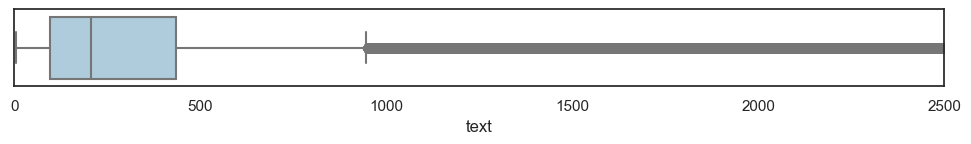

In [14]:
# диаграмм размаха для длинны комментариев
plt.figure(figsize=(12, 1))
sns.boxplot(x=length)
plt.xlim(0, 2500)
plt.show()

<div style='border:solid blue 3px; padding: 20px'>
    
**Выводы п.1.1:**

- столбец **Unnamed** нужно удалить
- классы несбалансированы, это надо учесть при обучении моделей при разделении на выборки **train/test**
- короткие комментарии встречаются значительно чаще длинных, это наглядно видно на графике зависимость количества комментариев от их длинны

### Изменение размера выборки от исходного датафрейма

<div style='border:solid green 3px; padding: 20px'>
    
**ВАЖНОЕ ЗАМЕЧАНИЕ**

Датафрейм достаточно объемный, для ускорения проверки правильности написания кода можно уменьшить его до 500 строк, после отладки кода достаточно оставить 50 000 строк.
    
Чем меньше выборка, тем хуже результаты моделей, зато можно быстро отладить код

In [15]:
df = df.sample(n = 50000, random_state = RS)
df.shape

(50000, 3)

### Подготовка текста (общий порядок)

При решении задачи классификации подготовки текста следуют такому алгоритму:

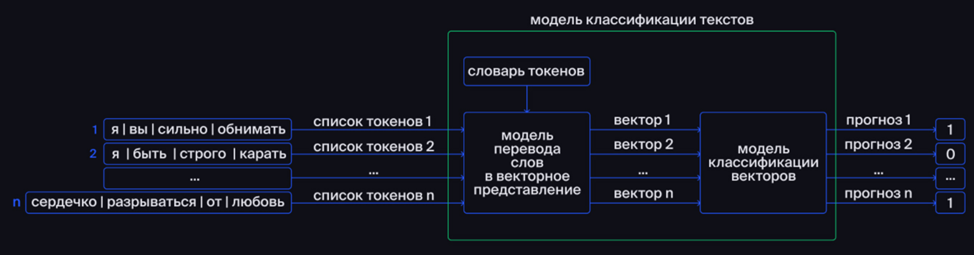

Как работает эта схема: 
1.	Прежде чем перейти к векторному представлению слов, проводится предобработка текста:
    - Выполняют токенизацию каждого текста, то есть его разбивают на слова;
    - Слова лемматизируют: приводят к начальной словарной форме;
    - Текст очищают от стоп-слов и ненужных символов;
2.	Для корректной работы алгоритма добавляют маркеры начала и конца предложения (они приравниваются к токенам).
3.	На выходе у каждого исходного текста образуется свой список токенов.
4.	Затем токены передают модели, которая переводит их в векторные представления. Для этого модель обращается к составленному заранее словарю токенов. На выходе для каждого текста образуются векторы заданной длины.
5.	На финальном этапе модели передают признаки (векторы). И она прогнозирует эмоциональную окраску текста — 0 («отрицательная») или 1 («положительная»).


### Удаление ненужных признаков датафрейма

In [16]:
# удалим признак Unnamed - индексы строк
df = df.drop(['Unnamed: 0'], axis=1)

### Лемматизация

Создадим корпус слов

In [17]:
corpus = list(df['text'])

In [18]:
lemm = []
for i in tqdm(range(len(corpus))):
    
    lemm.append(lemmatize_text(clear_text(corpus[i])))

df['lemm_text'] = pd.Series(lemm, index = df.index)

100%|██████████| 50000/50000 [04:03<00:00, 205.75it/s]


In [19]:
df.head()

,text,toxic,lemm_text
138682,"Well, it was deliberate vandalism so you don't have to be so kind, Jeff. He deserved a worse warning. -",0,Well it wa deliberate vandalism so you do n't have to be so kind Jeff He deserved a worse warning
5200,"Protection requested \n\nI have requested that this page be protected, in light of the contentious, potentially libelous edits being made.",0,Protection requested I have requested that this page be protected in light of the contentious potentially libelous edits being made
52615,John Baird page edits \nJohn Baird is a fucking cunt. So the edits are correct and should not be reverted. Many thanks.\n\nmany thanks.,1,John Baird page edits John Baird is a fucking cunt So the edits are correct and should not be reverted Many thanks many thanks
38696,"""\n\n ANI \n\nYou have been reported here Talk """,0,ANI You have been reported here Talk
137350,"Re: Sorry to hear of your loss \n\nThanks Tony. My older cousin was always sort of my own personal Ace Rimmer, off saving the world while I did nothing for it. As it turns out, he contracted Typhoid fever while attempting to rescue a band of dislocated Australian marsupials from a Florida barn of all things. Crazy thing. Anyway, I'm about to retire from the project on this whole Pokemon >>> History score, but I wish you good luck in your endeavors. talk",0,Re Sorry to hear of your loss Thanks Tony My older cousin wa always sort of my own personal Ace Rimmer off saving the world while I did nothing for it As it turn out he contracted Typhoid fever while attempting to rescue a band of dislocated Australian marsupial from a Florida barn of all thing Crazy thing Anyway I 'm about to retire from the project on this whole Pokemon History score but I wish you good luck in your endeavor talk


<div style='border:solid blue 3px; padding: 20px'>
    
**Выводы п.1:**
 
- выведена общая информация о датафрейме
- круговая диаграмма распределения целевого признака негатив/позитив: классы несбалансированы, это надо учесть при обучении моделей при разделении на выборки train/test
- приведена ависимость количества комментариев от их длинны
- в датафрейме удален признак Unnamed - индексы строк
- проведена очистака текста от ненужных символов
- проведена лемматизация

## Обучение

### Подготовка к обучению моделей

In [20]:
X = df['lemm_text']
y = df['toxic']

# при разбивке на выборки учтем несбалансированность классов методом stratify
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = RS, stratify = y) 

print("Размер обучающей выборки с признаками:", X_train.shape)
print("Размер тестовой выборки с признаками:", X_test.shape)
print("Размер обучающей выборки с целевым признаком:", y_train.shape)
print("Размер тестовой выборки с целевым признаком:", y_test.shape)

Размер обучающей выборки с признаками: (40000,)
Размер тестовой выборки с признаками: (10000,)
Размер обучающей выборки с целевым признаком: (40000,)
Размер тестовой выборки с целевым признаком: (10000,)


### Балансировка классов

Классы не сбалансированы. Сделаем балансировку - вызовем функцию up_sample

In [21]:
X_train_up_samp, y_train_up_samp = up_sample(X_train, y_train, 0.6, 5)

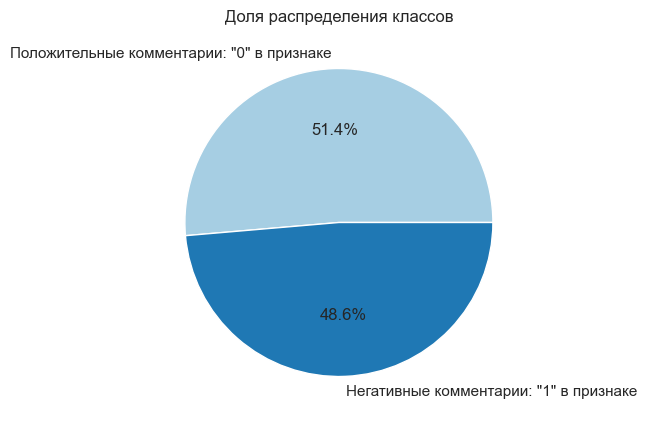

In [22]:
# построение диаграммы распределения классов
y_train_up_samp.value_counts(normalize = True).plot(
    kind = 'pie',
    figsize = [5, 5],
    legend = False,
    autopct = '%1.1f%%',
    labels = ['Положительные комментарии: "0" в признаке',
              'Негативные комментарии: "1" в признаке'])

plt.title('Доля распределения классов')
plt.ylabel('')
plt.show()

### Векторизация слов методом TF-IDF

Вычислим TF-IDF для корпуса текстов

In [23]:
count_TF_IDF = TfidfVectorizer(stop_words = STOP_WORDS, analyzer = 'word') 
TF_IDF_train = count_TF_IDF.fit_transform(X_train)
TF_IDF_test = count_TF_IDF.transform(X_test)

<div style='border:solid blue 3px; padding: 20px'>
    
**Выводы п.2:**
    
- подготовлены выборки с учетом несбалансированности классов
- проведена оценка важности слов методом TF-IDF

## Модели

### DecisionTreeClassifier

In [24]:
%%time
best_model_dt = None
best_result_dt = 0
best_depth_dt = 0

for depth in tqdm(range(1, 25, 3)):
    model_dt = DecisionTreeClassifier(random_state = RS,
                                      max_depth = depth,
                                      class_weight = 'balanced') 
    scores = cross_val_score(model_dt, TF_IDF_train, y_train, cv=5, scoring='f1')
    result_dt = np.mean(scores)
    if result_dt > best_result_dt:
        best_model_dt = model_dt
        best_result_dt = result_dt
        best_depth_dt = depth
        
print("F1 наилучшей модели равно:", best_result_dt.round(2), end = '')
print(' C глубиной:', best_depth_dt)

100%|██████████| 8/8 [01:23<00:00, 10.43s/it]

F1 наилучшей модели равно: 0.59 C глубиной: 22
CPU times: user 1min 22s, sys: 366 ms, total: 1min 23s
Wall time: 1min 23s


<div class="alert alert-block alert-info">
<b>Совет: </b> Внутри кросс-валидации происходит разбиение выборки на треин и валидацию. Однако, в таком случае векторизатор обучен на всей выборке, а это не совсем корректно. Для избежания такого эффекта можно использовать <a href="https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html">пайплайн</a> из векторизатора и модели. <a href="https://medium.com/analytics-vidhya/ml-pipelines-using-scikit-learn-and-gridsearchcv-fe605a7f9e05">Тут</a> есть пример.
</div>

### LogisticRegression

In [25]:
%%time
clf_lr = LogisticRegression(random_state = RS,
                            solver='sag',
                            class_weight = 'balanced')
parametrs_lr = { 'C': range (1, 10),
              'max_iter': range (10, 15, 2),
              }
grid_lr = GridSearchCV(clf_lr,
                       parametrs_lr,
                       cv=3,
                       scoring='f1')

grid_lr.fit(TF_IDF_train, y_train)
grid_lr.best_params_
print("F1 наилучшей модели равно:", grid_lr.best_score_.round(2), end = '')
print(' C параметрами:', grid_lr.best_params_)

F1 наилучшей модели равно: 0.75 C параметрами: {'C': 9, 'max_iter': 14}
CPU times: user 10.3 s, sys: 62.4 ms, total: 10.3 s
Wall time: 10.4 s


### RandomForestClassifier

In [26]:
%%time
best_model_rf = None
best_result_rf = 0
best_depth_rf = 0

param_grid = {'n_estimators': [1, 5, 9, 13]}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=RS, class_weight='balanced'), param_grid, scoring='f1')
grid_rf.fit(TF_IDF_train, y_train)

best_model_rf = grid_rf.best_estimator_
best_result_rf = grid_rf.best_score_
best_depth_rf = grid_rf.best_params_['n_estimators']

print("F1 наилучшей модели:", best_result_rf.round(2), end = '')
print(' C глубиной:', best_depth_rf)

F1 наилучшей модели: 0.6 C глубиной: 13
CPU times: user 2min, sys: 340 ms, total: 2min 1s
Wall time: 2min 1s


Сведём интересующие нас данные в одну таблицу для наглядности

In [27]:
final = pd.DataFrame(index=['F1'], columns = ['DecisionTreeClassifier',
                                              'RandomForestClassifier',
                                              'LogisticRegression'])
final['DecisionTreeClassifier'] = best_result_dt.round(2)
final['RandomForestClassifier'] = best_result_rf.round(2)
final['LogisticRegression'] = grid_lr.best_score_.round(2)
final.T

,F1
DecisionTreeClassifier,0.5900
RandomForestClassifier,0.6000
LogisticRegression,0.7500


<div style='border:solid blue 3px; padding: 20px'>
    
**Выводы п.3:**
    
**F1** лучшей модели:  0.75 у модели **LogisticRegression** с параметрами 'C': 9, 'max_iter': 14

## Тест лучшей модели

Оценим вероятность возникновения положительного класса. Посмотрим на порог классификации для наилучшей модели **LogisticRegression**

In [28]:
probabilities = grid_lr.predict_proba(TF_IDF_test)
probabilities_one = probabilities[:, 1]

print("Вероятности положительного класса:", probabilities_one[:2])

Вероятности положительного класса: [0.4134922  0.36269992]


In [29]:
for threshold in np.arange(0.4, 0.9, 0.02):
    predicted_v = probabilities_one > threshold
    precision = precision_score(y_test, predicted_v)
    recall = recall_score(y_test, predicted_v) 
    f1 = f1_score(y_test, predicted_v)

Построим кривую зависимости точности (precision) предсказания от полноты (recall)

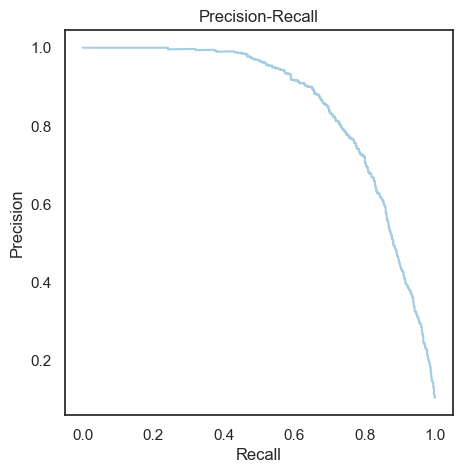

In [30]:
precision, recall, thresholds = precision_recall_curve(y_test, probabilities[:, 1])
plt.figure(figsize=(5, 5))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall')
plt.show() 

In [31]:
predicted_rf_threshold = (probabilities_one > 0.75) * 1

print(classification_report(y_test, predicted_rf_threshold, target_names = target_names))

              precision    recall  f1-score   support

    Is toxic       0.97      0.99      0.98      8980
   Non-toxic       0.86      0.69      0.76      1020

    accuracy                           0.96     10000
   macro avg       0.91      0.84      0.87     10000
weighted avg       0.95      0.96      0.95     10000



Проверим выбранный порог для **LogisticRegression**

In [32]:
predicted_test = (grid_lr.predict_proba(TF_IDF_test)[:,1] > 0.75) * 1
f1_LR = f1_score(y_test, predicted_test).round(2)

print('F1 наилучшей модели: ', f1_LR)

F1 наилучшей модели:  0.76


Посмотрим на распределение метрики **f1** лучшей модели

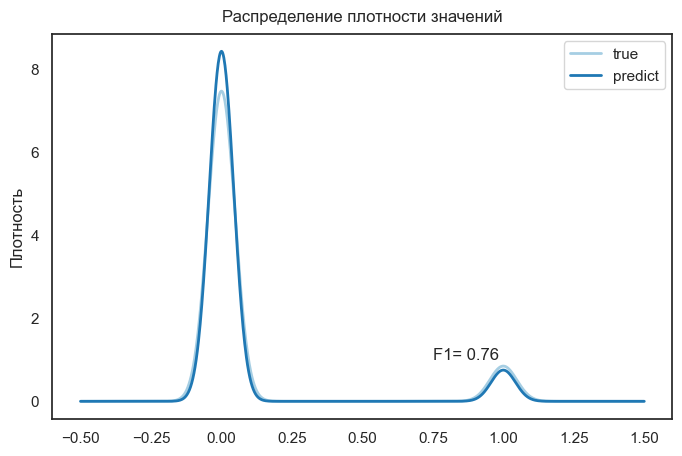

In [33]:
f1_plot(y_test, predicted_test)

ROC-AUC для лучшей модели

In [34]:
fpr, tpr, thresholds = roc_curve(y_test, probabilities_one)
auc_roc = roc_auc_score(y_test, probabilities_one)

print('ROC-AUC: {:.2f}'.format(auc_roc))

ROC-AUC: 0.96


Построим ROC-кривую распределения значений

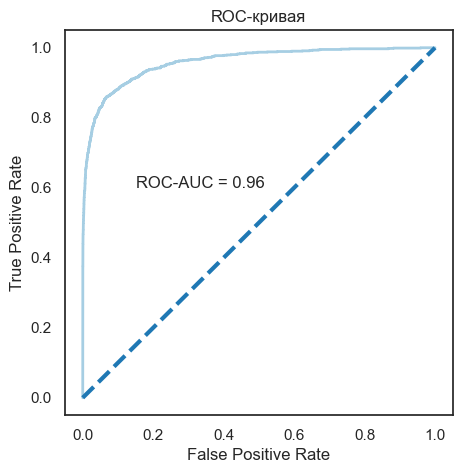

In [35]:
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, linewidth = 2)
plt.plot([0, 1], [0, 1], linestyle = '--', linewidth=3)
plt.text(0.15, 0.6, 'ROC-AUC = {:.2f}'.format(auc_roc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

<div style='border:solid blue 3px; padding: 20px'>
    
**Выводы п.3:**
    
**F1** наилучшей модели на тестовой выборке составило:  0.76 у модели **LogisticRegression** с параметрами 'C': 9, 'max_iter': 14

## Итоговые результаты

<Figure size 500x500 with 0 Axes>

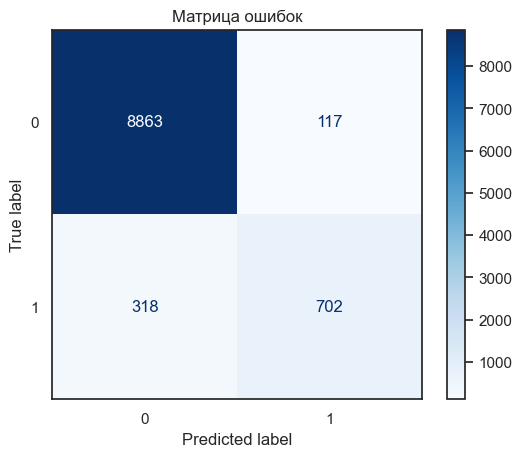

In [36]:
cm = confusion_matrix(y_test, predicted_test)

plt.figure(figsize = (5, 5));
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot(cmap = 'Blues')
plt.title('Матрица ошибок')
plt.grid(False)
plt.show()

## Советы от ревьюера

<div style='border:solid violet 5px; padding: 20px'>

    Про дисбаланс классов: можно попробовать реализовать подход из статьи: https://kiwidamien.github.io/how-to-do-cross-validation-when-upsampling-data.html .
    
<font color='green'><b>Полезные (и просто интересные) материалы:</b></font> \
Для работы с текстами используют и другие подходы. Например, сейчас активно используются RNN (LSTM) и трансформеры (BERT и другие с улицы Сезам, например, ELMO). НО! Они не являются панацеей, не всегда они нужны, так как и TF-IDF или Word2Vec + модели из классического ML тоже могут справляться. \
BERT тяжелый, существует много его вариаций для разных задач, есть готовые модели, есть надстройки над библиотекой transformers. Если, обучать BERT на GPU (можно в Google Colab или Kaggle), то должно быть побыстрее.\
https://huggingface.co/transformers/model_doc/bert.html \
https://t.me/renat_alimbekov \
https://colah.github.io/posts/2015-08-Understanding-LSTMs/ - Про LSTM \
https://web.stanford.edu/~jurafsky/slp3/10.pdf - про энкодер-декодер модели, этеншены\
https://pytorch.org/tutorials/beginner/transformer_tutorial.html - официальный гайд
по трансформеру от создателей pytorch\
https://transformer.huggingface.co/ - поболтать с трансформером \
Библиотеки: allennlp, fairseq, transformers, tensorflow-text — множествореализованных
методов для трансформеров методов NLP \
Word2Vec https://radimrehurek.com/gensim/models/word2vec.html 

<font color='green'>Пример BERT с GPU:
```python
%%time
from tqdm import notebook
batch_size = 2 # для примера возьмем такой батч, где будет всего две строки датасета
embeddings = [] 
for i in notebook.tqdm(range(input_ids.shape[0] // batch_size)):
        batch = torch.LongTensor(input_ids[batch_size*i:batch_size*(i+1)]).cuda() # закидываем тензор на GPU
        attention_mask_batch = torch.LongTensor(attention_mask[batch_size*i:batch_size*(i+1)]).cuda()
        
        with torch.no_grad():
            model.cuda()
            batch_embeddings = model(batch, attention_mask=attention_mask_batch)
        
        embeddings.append(batch_embeddings[0][:,0,:].cpu().numpy()) # перевод обратно на проц, чтобы в нумпай кинуть
        del batch
        del attention_mask_batch
        del batch_embeddings
        
features = np.concatenate(embeddings) 
```
Можно сделать предварительную проверку на наличие GPU.\
Например, так: ```device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")```\
Тогда вместо .cuda() нужно писать .to(device)

Если понравилась работа с текстами, то можешь посмотреть очень интересный (но очень-очень сложный) курс лекций: https://github.com/yandexdataschool/nlp_course .
</font>